<a href="https://colab.research.google.com/github/Scott-Huston/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [7]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [8]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [9]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [10]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [11]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [12]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [13]:
df = pd.merge(income, lifespan)
df.shape

(40437, 4)

In [14]:
df = pd.merge(df, population)
df.shape

(40437, 5)

In [15]:
entities['world_4region'].value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [16]:
entities_variables = ['country', 'name', 'world_6region']
entities = entities[entities_variables]

print(entities.shape)
entities.head()

(273, 3)


,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [0]:
merged = pd.merge(entities, df, left_on = 'country', right_on = 'geo')

In [18]:
print(df.shape)
df.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
merged = merged.drop(['geo', 'country'], axis='columns')

In [20]:
merged = merged.rename(columns = {
    'time':'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total':'population',
    'name':'country',
    'world_6region': 'region'
})

merged.head()

,country,region,year,income,lifespan,population
0,Afghanistan,south_asia,1800,603,28.21,3280000
1,Afghanistan,south_asia,1801,603,28.20,3280000
2,Afghanistan,south_asia,1802,603,28.19,3280000
3,Afghanistan,south_asia,1803,603,28.18,3280000
4,Afghanistan,south_asia,1804,603,28.17,3280000


## Explore data

In [21]:
merged.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [22]:
merged.dtypes

country        object
region         object
year            int64
income          int64
lifespan      float64
population      int64
dtype: object

In [23]:
merged.describe(exclude = 'number')

,country,region
count,40437,40437
unique,187,6
top,Israel,europe_central_asia
freq,219,10778


In [24]:
merged.country.unique()


array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [25]:
usa = merged[merged.country=='United States']
usa.head()

,country,region,year,income,lifespan,population
38028,United States,america,1800,2127,39.41,6801854
38029,United States,america,1801,2167,39.41,6933517
38030,United States,america,1802,2202,39.41,7067728
38031,United States,america,1803,2166,39.41,7204538
38032,United States,america,1804,2165,39.41,7343995


In [26]:
usa[usa.year.isin([1818,1918,2018])]

,country,region,year,income,lifespan,population
38046,United States,america,1818,2258,39.41,9879049
38146,United States,america,1918,9371,47.18,106721812
38246,United States,america,2018,54898,79.14,326766748


In [27]:
china = merged[merged.country == 'China']
china[china.year.isin([1818,1918,2018])]

,country,region,year,income,lifespan,population
6854,China,east_asia_pacific,1818,985,32.00,374161494
6954,China,east_asia_pacific,1918,989,22.13,462444535
7054,China,east_asia_pacific,2018,16018,76.92,1415045928


## Plot visualization

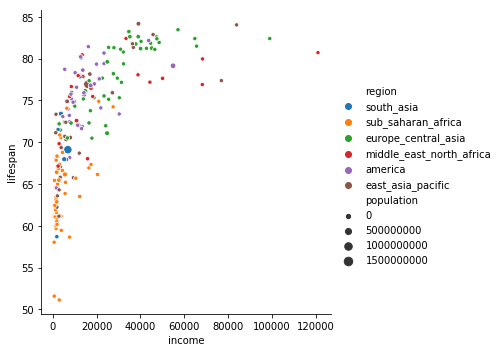

In [28]:
import seaborn as sns
now = merged[merged['year'] == 2018]

sns.relplot(y = 'lifespan', x = 'income', size = 'population', hue = 'region', data = now);

In [29]:
qatar_now = now[now.country == 'Qatar']
qatar_now.head()

,country,region,year,income,lifespan,population
30362,Qatar,middle_east_north_africa,2018,121033,80.71,2694849


Text(30362    123033
Name: income, dtype: int64, 30362    81.71
Name: lifespan, dtype: float64, 'Qatar')

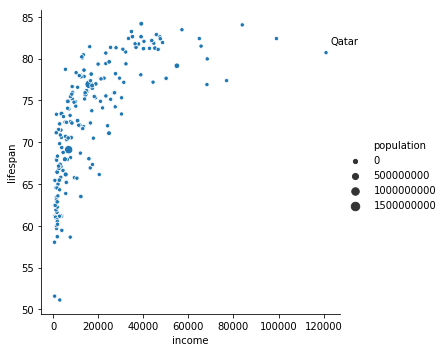

In [30]:
sns.relplot(x = 'income', y = 'lifespan', size = 'population', data = now)
plt.text(x = qatar_now.income + 2000, y = qatar_now.lifespan+1, s = 'Qatar')

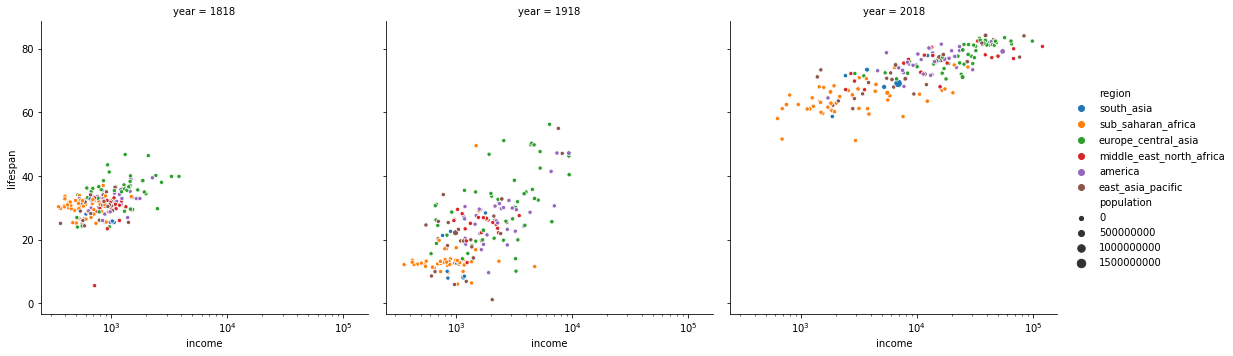

In [31]:
years = [1818, 1918, 2018]
centuries = merged[merged.year.isin(years)]

sns.relplot(x = 'income'
            , y = 'lifespan'
            , size = 'population'
            , hue = 'region'
            , col = 'year'
            , data = centuries)
plt.xscale('log')

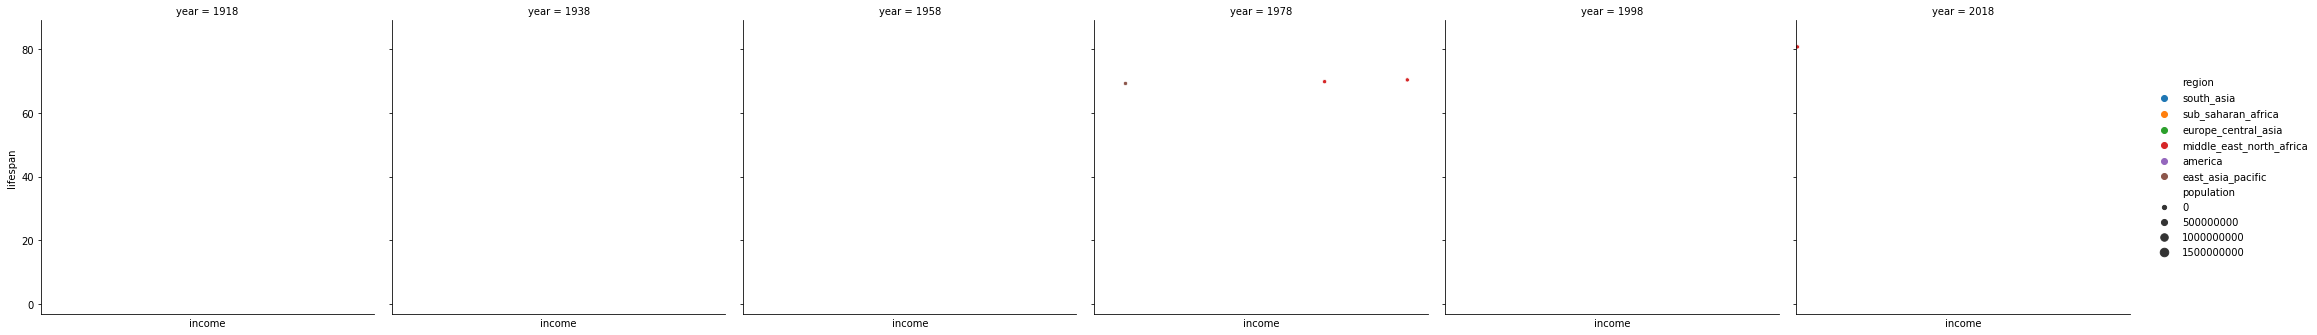

In [32]:
years = [1918, 1938, 1958, 1978, 1998, 2018]
decades = merged[merged.year.isin(years)]

sns.relplot(x = 'income'
            , y = 'lifespan'
            , size = 'population'
            , hue = 'region'
            , col = 'year'
            , data = decades)
plt.xscale('log')

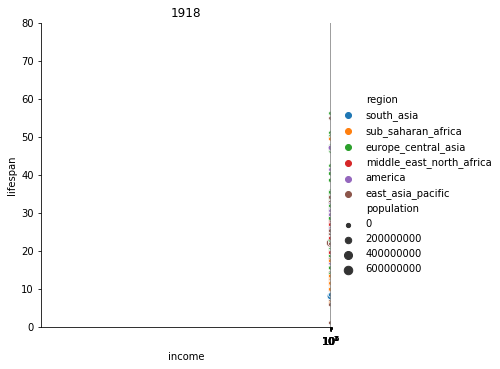

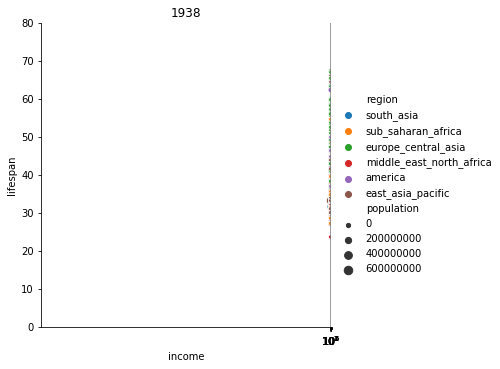

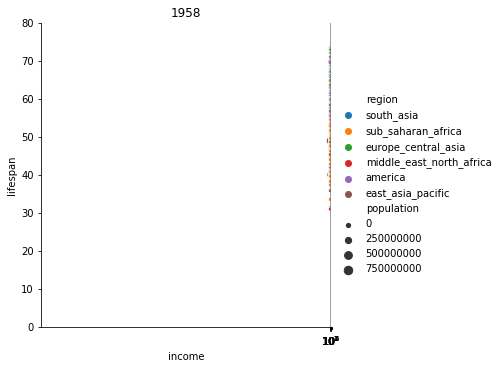

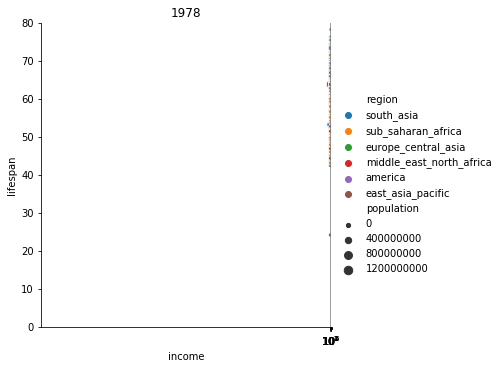

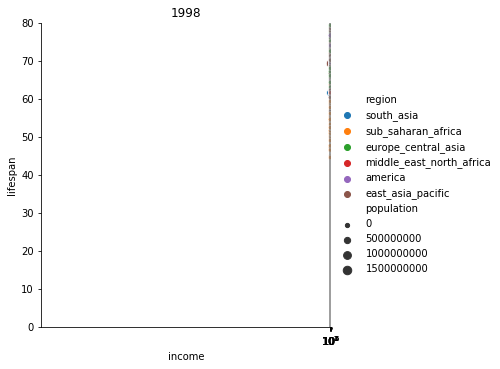

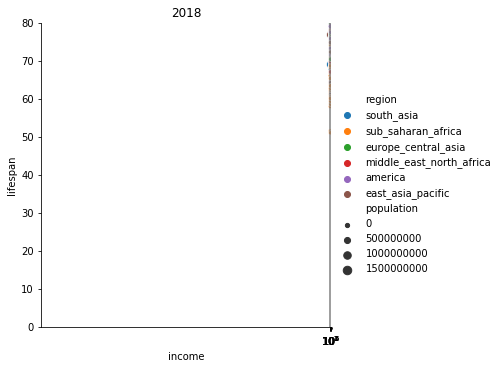

In [33]:
for year in years:
  sns.relplot(x = 'income'
             ,y = 'lifespan'
             ,size = 'population'
             ,hue = 'region'
             ,data = merged[merged.year == year])
  
  plt.xlim(0,140000)
  plt.ylim(0,80)
  plt.xscale('log')
  plt.title(year)
  plt.axvline(x = 1000, color = 'grey')

In [34]:
merged[(merged.year == 1918) & (merged.lifespan>50)]

,country,region,year,income,lifespan,population
1698,Australia,east_asia_pacific,1918,7610,54.95,5066003
10067,Denmark,europe_central_asia,1918,6393,56.24,3165276
17513,Iceland,europe_central_asia,1918,2576,51.11,115504
27196,Norway,europe_central_asia,1918,4479,50.28,2576646


In [35]:
merged[(merged.year == 2018) & (merged.lifespan<50)]

,country,region,year,income,lifespan,population


## Analyze outliers

## Plot multiple years

In [36]:
merged.year.describe()

count    40437.000000
mean      1909.292900
std         63.308682
min       1800.000000
25%       1854.000000
50%       1909.000000
75%       1964.000000
max       2018.000000
Name: year, dtype: float64

## Point out a story

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


Text(0.5, 1.0, '1990')

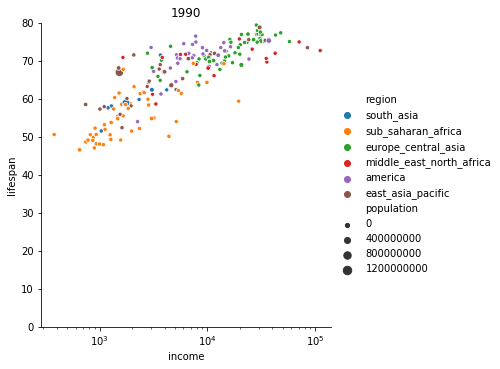

In [37]:
from google.colab import widgets

year = 1990 #@param {type: "slider", min: 1800, max: 2018, step:1}
title = str(year)

sns.relplot(x = 'income'
            ,y = 'lifespan'
            ,size = 'population'
            ,hue = 'region'
            ,data = merged[merged.year == year]);

plt.xscale('log')
plt.xlim(0,140000)
plt.ylim(0,80)
plt.title(title)



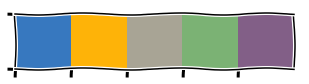

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

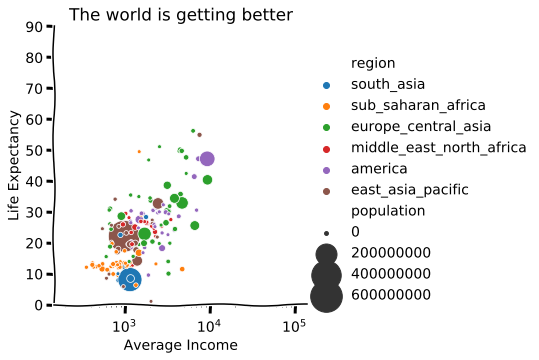

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

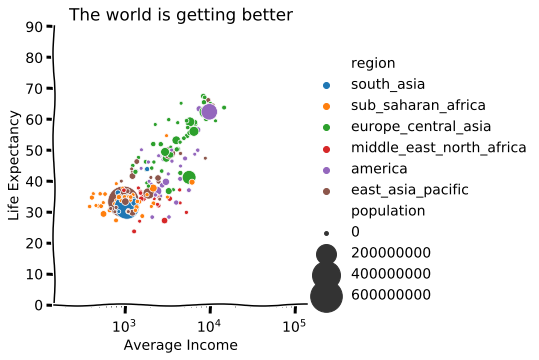

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

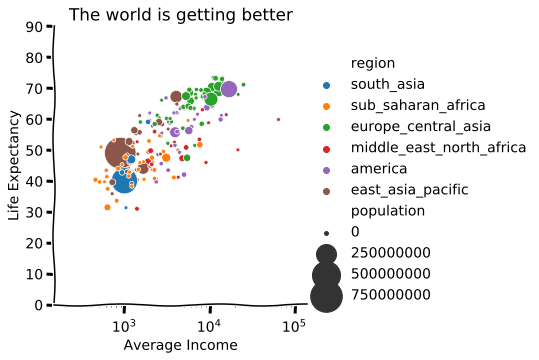

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

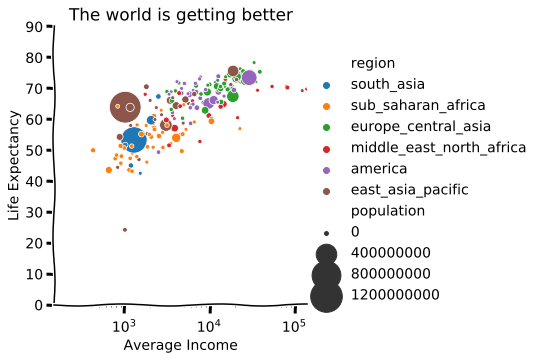

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

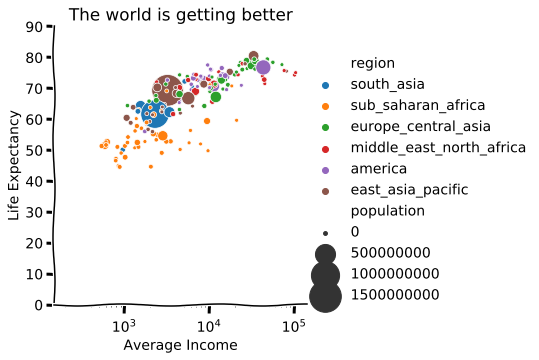

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

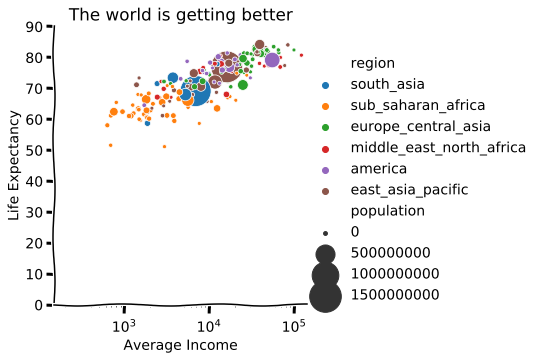

<IPython.core.display.Javascript object>

In [40]:
import matplotlib.style as style
plt.xkcd() # This would be a bad choice for this fairly serious data but I just found out about it and it's too fun not to use
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors));
from google.colab import widgets
tb = widgets.TabBar([str(year) for year in years])

for tab, year in zip(tb, years):
  sns.relplot(x = 'income'
              , y = 'lifespan'
              , size = 'population'
              , hue = 'region'
              , sizes=(15, 1000)
              , data = merged[merged.year == year])
  
  plt.xscale('log')
  plt.xlim(150,140000)
  plt.ylim(0,90)
  plt.ylabel('Life Expectancy')
  plt.xlabel('Average Income')
  plt.title('The world is getting better')
#   plt.ticklabel_format(style = 'plain', axis = 'x')
#   plt.set_xticks('$1,000', '$10,000', '$100,000')
#   plt.get_xaxis().get_major_formatter().labelOnlyBase = False
#   plt.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# ASSIGNMENT
Replicate the lesson code

- improve gapminder graph somehow:
- dot size
- add title and subtitle
- optional: see how it looks with 4 regions
- maybe play with minor tick marks

Get portfolio site somewhat decent

On Sprint Challenge
need merge, sort, filter, 
df.sort(by = 'header_name')
make new columng
know how to make subtitle
describe function non-numeric
reshape using crosstab/pivot/melt
replicate 538 graph
-adding text works slightly differently in different libraries



# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project